# Heart Disease Predictor
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Data pre-processing

### Features chosen
age:age in years <br />
sex-:(1 = male; 0 = female) <br />
cp:chest pain type <br />
trestbps-resting blood pressure (in mm Hg on admission to the hospital) <br />
chol:serum cholestoral in mg/dl <br />
fbs:(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br />
restecg:resting electrocardiographic results <br />
thalach:maximum heart rate achieved <br />
exang:exercise induced angina (1 = yes; 0 = no) <br />
oldpeak:ST depression induced by exercise relative to rest <br />
slope:the slope of the peak exercise ST segment <br />
ca:number of major vessels (0-3) colored by flourosopy <br />
thal:3 = normal; 6 = fixed defect; 7 = reversable defect <br />
target:1 or 0


In [1]:
import pandas as pd

dataset = pd.read_csv("heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# detailed statistical info of the dataset 
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### Feature scaling

In [3]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
# age is taken in groups as a categorical variable
# target variable is not normalized as 
cols_to_norm = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

# OR use the MinMaxScalar in sklearn
dataset[cols_to_norm] = dataset[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,37,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,41,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,56,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,57,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


In [5]:
import tensorflow as tf

In [6]:
# creating tensorflow feature columns
Age = tf.feature_column.numeric_column('age')
gender = tf.feature_column.numeric_column('sex')
Cp = tf.feature_column.numeric_column('cp')
trest_bps = tf.feature_column.numeric_column('trestbps')
Chol = tf.feature_column.numeric_column('chol')
Fbs = tf.feature_column.numeric_column('fbs')
rest_ecg = tf.feature_column.numeric_column('restecg')
thal_ach = tf.feature_column.numeric_column('thalach')
ex_ang = tf.feature_column.numeric_column('exang')
old_peak = tf.feature_column.numeric_column('oldpeak')
Slope = tf.feature_column.numeric_column('slope')
Ca = tf.feature_column.numeric_column('ca')
Thal = tf.feature_column.numeric_column('thal')

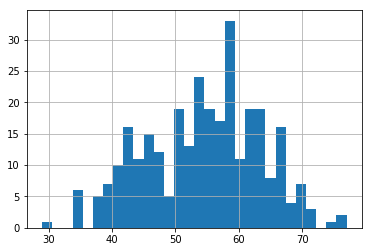

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# distribution of ages
dataset['age'].hist(bins=30)

In [8]:
# forming age groups
#age_groups = tf.feature_column.bucketized_column(Age, boundaries=[20,30,40,50,60,70,80])
#or
age_groups = tf.feature_column.bucketized_column(Age, boundaries=[25,35,45,55,65,75,85])

In [9]:
feat_cols = [age_groups, gender , Cp , trest_bps , Chol , Fbs , rest_ecg , thal_ach , ex_ang , old_peak , Slope ,Ca, Thal]

#### Train test split

In [10]:
x_data = dataset.iloc[:,:13]
labels = dataset.iloc[:,13:14]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=42)

#### Input function

In [12]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=500,shuffle=True)

#### Model creation

In [13]:
model = tf.estimator.DNNClassifier(hidden_units=[14,14,14] , feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_session_config': None, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\ADITYA\\AppData\\Local\\Temp\\tmpa_1zhm_c', '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None}


In [14]:
model.train(input_fn=input_func,steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ADITYA\AppData\Local\Temp\tmpa_1zhm_c\model.ckpt.
INFO:tensorflow:loss = 6.8212943, step = 1
INFO:tensorflow:global_step/sec: 109.571
INFO:tensorflow:loss = 6.8202896, step = 101 (0.916 sec)
INFO:tensorflow:global_step/sec: 290.481
INFO:tensorflow:loss = 2.7366228, step = 201 (0.345 sec)
INFO:tensorflow:global_step/sec: 322.372
INFO:tensorflow:loss = 6.2266026, step = 301 (0.303 sec)
INFO:tensorflow:global_step/sec: 336.459
INFO:tensorflow:loss = 0.7510737, step = 401 (0.298 sec)
INFO:tensorflow:global_step/sec: 311.287
INFO:tensorflow:loss = 1.6619585, step = 501 (0.320 sec)
INFO:tensorflow:global_step/sec: 354.358
INFO:tensorflow:loss = 6.246785, step = 601 (0.288 sec)
INFO:tensorflow:global_step/sec: 314.261
INFO:tensorflow:loss = 0.97930354, step = 701 (0.311 sec)
INFO:tensorflow:global_step/sec: 311.306
INFO:tensorflow:loss = 1.8327425, step = 801 (0.322 sec)
INFO:tensorflow:global_s

#### Evaluation

In [15]:
# input function for evaluation
eval_input_func = tf.estimator.inputs.pandas_input_fn( x=X_test , y=y_test , batch_size=10 , num_epochs=1 , shuffle=False )

In [16]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-07-08-13:17:40
INFO:tensorflow:Restoring parameters from C:\Users\ADITYA\AppData\Local\Temp\tmpa_1zhm_c\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-07-08-13:17:41
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.85714287, accuracy_baseline = 0.5494506, auc = 0.9082927, auc_precision_recall = 0.91988444, average_loss = 0.44720283, global_step = 1000, label/mean = 0.5494506, loss = 4.0695457, prediction/mean = 0.52308


In [17]:
results

{'accuracy': 0.85714287,
 'accuracy_baseline': 0.5494506,
 'auc': 0.9082927,
 'auc_precision_recall': 0.91988444,
 'average_loss': 0.44720283,
 'global_step': 1000,
 'label/mean': 0.5494506,
 'loss': 4.0695457,
 'prediction/mean': 0.52308}

#### Prediction

In [18]:
# input function for prediction
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [19]:
# store all predictions
predictions = list(model.predict(pred_input_func))

predictions

INFO:tensorflow:Restoring parameters from C:\Users\ADITYA\AppData\Local\Temp\tmpa_1zhm_c\model.ckpt-1000


[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.03981823], dtype=float32),
  'logits': array([-3.1827977], dtype=float32),
  'probabilities': array([0.9601818 , 0.03981823], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.43676716], dtype=float32),
  'logits': array([-0.25429285], dtype=float32),
  'probabilities': array([0.56323284, 0.43676716], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.8559684], dtype=float32),
  'logits': array([1.782201], dtype=float32),
  'probabilities': array([0.14403155, 0.8559684 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.01572546], dtype=float32),
  'logits': array([-4.136624], dtype=float32),
  'probabilities': array([0.98427457, 0.01572546], dtype=float32)},
 {'class_id

In [20]:
# obtain class_ids which stores the prediction value of 0 or 1
final_preds = []

for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_preds))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85        41
          1       0.89      0.84      0.87        50

avg / total       0.86      0.86      0.86        91



[[36  5]
 [ 8 42]]


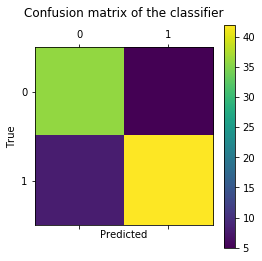

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,final_preds)
print(cm)

plt.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()